In [ ]:
# Using the ACUCO symbols, align and orient the photograph

import cv2
import cv2.aruco as aruco
import numpy as np
image = cv2.imread('image.jpg')
img_temp = cv2.imread('Homework8.jpg')

aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_4X4_1000)
parameters = aruco.DetectorParameters()

corners, ids, rejected = aruco.detectMarkers(image, aruco_dict, parameters=parameters)
corners2, ids2, rejected2 = aruco.detectMarkers(img_temp, aruco_dict, parameters=parameters)


src_pts = [corner[0][0] for corner in corners[:3]]
dst_pts = [corner2[0][0] for corner2 in corners2[:3]]

src_pts[0], src_pts[1] = src_pts[1], src_pts[0]

print(src_pts)
print(dst_pts)
matrix = cv2.getAffineTransform(np.float32(src_pts), np.float32(dst_pts))
aligned_image = cv2.warpAffine(image, matrix, (img_temp.shape[1], img_temp.shape[0]))

cv2.imwrite('aligned_image.jpg', aligned_image)

In [ ]:
# Using EasyOCR, read in the name box that you wrote

import cv2
import easyocr

image = cv2.imread('aligned_image.jpg')

dpi = 300
cm_to_pixel = dpi / 2.54

image_width_px = image.shape[1]
image_height_px = image.shape[0]
image_center_x = image_width_px // 2
image_center_y = image_height_px // 2

box_width_cm = 10
box_height_cm = 2
box_x_cm = -10
box_y_cm = -15

box_width_px = int(box_width_cm * cm_to_pixel)
box_height_px = int(box_height_cm * cm_to_pixel)
box_x_px = int(box_x_cm * cm_to_pixel + image_center_x)
box_y_px = int(box_y_cm * cm_to_pixel + image_center_y)

text_box_roi = image[box_y_px:box_y_px + box_height_px, box_x_px:box_x_px + box_width_px]

cv2.imwrite('text_box_roi.jpg', text_box_roi)

reader = easyocr.Reader(['en'])
result = reader.readtext(text_box_roi)

print("OCR Results for TEXT BOX:")
for detection in result:
    text = detection[1]
    confidence = detection[2]
    print(f"Detected text: '{text}' with confidence: {confidence}")


OCR Results for TEXT BOX:
Detected text: 'Jiyang' with confidence: 0.625393381944827
Detected text: 'Lu' with confidence: 0.9158742103283831


In [ ]:
# Write code to check which of the two checkboxes is marked by comparing the intensity in the two boxes

import cv2
import numpy as np


image_path = "image.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

dpi = 300
cm_to_pixels = dpi / 2.54

checkbox_ece_1390 = {
    "x": int((-22) * cm_to_pixels),
    "y": int((7) * cm_to_pixels),
    "width": int(2 * cm_to_pixels),
    "height": int(1 * cm_to_pixels),
}
checkbox_ece_2390 = {
    "x": int((-22) * cm_to_pixels),
    "y": int((8.5) * cm_to_pixels),
    "width": int(2 * cm_to_pixels),
    "height": int(1 * cm_to_pixels),
}

ece_1390_region = image[
    checkbox_ece_1390["y"]:checkbox_ece_1390["y"] + checkbox_ece_1390["height"],
    checkbox_ece_1390["x"]:checkbox_ece_1390["x"] + checkbox_ece_1390["width"]
]
ece_2390_region = image[
    checkbox_ece_2390["y"]:checkbox_ece_2390["y"] + checkbox_ece_2390["height"],
    checkbox_ece_2390["x"]:checkbox_ece_2390["x"] + checkbox_ece_2390["width"]
]

cv2.imwrite("ece_1390_checkbox.jpg", ece_1390_region)
cv2.imwrite("ece_2390_checkbox.jpg", ece_2390_region)

intensity_1390 = np.mean(ece_1390_region)
intensity_2390 = np.mean(ece_2390_region)

result = "ECE-1390 checkbox is marked." if intensity_1390 < intensity_2390 else "ECE-2390 checkbox is marked."
print(result)


ECE-2390 checkbox is marked.


In [ ]:
# Using the example from class on OCR-digits, decode the 5 numbers you wrote

import cv2

image = cv2.imread('aligned_image.jpg')

a4_width_cm = 21.0
a4_height_cm = 29.7

image_width_px = image.shape[1]
image_height_px = image.shape[0]

cm_to_pixel_width = image_width_px / a4_width_cm
cm_to_pixel_height = image_height_px / a4_height_cm
cm_to_pixel = (cm_to_pixel_width + cm_to_pixel_height) / 2

image_center_x = image_width_px // 2
image_center_y = image_height_px // 2

digit_width_cm = 1.5
digit_height_cm = 1.5
digit_y_cm = -4.5
digit_x_cm_list = [-8.3, -6.8, -5.3, -3.8, -2.3]
digits = []
for x_cm in digit_x_cm_list:
    x_px = int(x_cm * cm_to_pixel + image_center_x)
    y_px = int(digit_y_cm * cm_to_pixel + image_center_y)
    width_px = int(digit_width_cm * cm_to_pixel)
    height_px = int(digit_height_cm * cm_to_pixel)
    digit_region = image[y_px:y_px + height_px, x_px:x_px + width_px]
    digits.append(digit_region)

for i, digit in enumerate(digits):
    cv2.imwrite(f'digit_{i+1}.jpg', digit)
    print(f"Saved digit {i+1} region as 'digit_{i+1}.jpg'")


Saved digit 1 region as 'digit_1.jpg'
Saved digit 2 region as 'digit_2.jpg'
Saved digit 3 region as 'digit_3.jpg'
Saved digit 4 region as 'digit_4.jpg'
Saved digit 5 region as 'digit_5.jpg'


In [79]:
import cv2
import pytesseract

digit_images = [f"digit_{i+1}.jpg" for i in range(5)]  # 假设数字图像已保存为 digit_1.jpg 到 digit_5.jpg

recognized_digits = []

for i, digit_path in enumerate(digit_images):
    digit_img = cv2.imread(digit_path, cv2.IMREAD_GRAYSCALE)

    _, binary_digit = cv2.threshold(digit_img, 128, 255, cv2.THRESH_BINARY)

    config = "--psm 10 -c tessedit_char_whitelist=0123456789"
    digit_text = pytesseract.image_to_string(binary_digit, config=config).strip()

    if not digit_text:
        digit_text = '?'

    recognized_digits.append(digit_text)

    print(f"Digit {i+1}: {digit_text}")

recognized_number = ''.join(recognized_digits)
print("Recognized 5-digit number:", recognized_number)


Digit 1: ?
Digit 2: ?
Digit 3: 2
Digit 4: 6
Digit 5: ?
Recognized 5-digit number: ??26?


In [ ]:
# Using Tesseract-OCR, read the printed text box ("some test to decode by openCV')

import cv2
import pytesseract

image = cv2.imread('aligned_image.jpg')

a4_width_cm = 21.0
a4_height_cm = 29.7

image_width_px = image.shape[1]
image_height_px = image.shape[0]

cm_to_pixel_width = image_width_px / a4_width_cm
cm_to_pixel_height = image_height_px / a4_height_cm
cm_to_pixel = (cm_to_pixel_width + cm_to_pixel_height) / 2  # 平均值作为最终比例

image_center_x = image_width_px // 2
image_center_y = image_height_px // 2

text_box_width_cm = 12
text_box_height_cm = 5
text_box_x_cm = -10
text_box_y_cm = 1

text_box_x_px = int(text_box_x_cm * cm_to_pixel + image_center_x)
text_box_y_px = int(text_box_y_cm * cm_to_pixel + image_center_y)
text_box_width_px = int(text_box_width_cm * cm_to_pixel)
text_box_height_px = int(text_box_height_cm * cm_to_pixel)

text_region = image[
    text_box_y_px:text_box_y_px + text_box_height_px,
    text_box_x_px:text_box_x_px + text_box_width_px,
]

cv2.imwrite("text_region.jpg", text_region)
print("Text region saved as 'text_region.jpg'.")

gray_text_region = cv2.cvtColor(text_region, cv2.COLOR_BGR2GRAY)

_, binary_text_region = cv2.threshold(gray_text_region, 128, 255, cv2.THRESH_BINARY)

cv2.imwrite("binary_text_region.jpg", binary_text_region)
print("Binary text region saved as 'binary_text_region.jpg'.")

config = "--psm 6"
decoded_text = pytesseract.image_to_string(binary_text_region, config=config)

print("Decoded Text from Text Box:")
print(decoded_text)


Text region saved as 'text_region.jpg'.
Binary text region saved as 'binary_text_region.jpg'.
Decoded Text from Text Box:
S OM E T E X T
T O D EC O D E
B Y O P EN C V



In [ ]:
# Using MediaPipe, find the facial features for the image of Dr Huppert and draw the markers on the image.

import cv2
import mediapipe as mp

image = cv2.imread('aligned_image.jpg')
a4_width_cm = 21.0
a4_height_cm = 29.7

image_width_px = image.shape[1]
image_height_px = image.shape[0]

cm_to_pixel_width = image_width_px / a4_width_cm
cm_to_pixel_height = image_height_px / a4_height_cm
cm_to_pixel = (cm_to_pixel_width + cm_to_pixel_height) / 2  # 平均值作为最终比例

image_center_x = image_width_px // 2
image_center_y = image_height_px // 2

face_width_cm = 10
face_height_cm = 7
face_x_cm = 3
face_y_cm = -3

face_x_px = int(face_x_cm * cm_to_pixel + image_center_x)
face_y_px = int(face_y_cm * cm_to_pixel + image_center_y)
face_width_px = int(face_width_cm * cm_to_pixel)
face_height_px = int(face_height_cm * cm_to_pixel)

face_region = image[
    face_y_px:face_y_px + face_height_px,
    face_x_px:face_x_px + face_width_px,
]
cv2.imwrite("face_with_markers.jpg", face_region)


Image loaded successfully.
Image with face landmarks saved at image_with_face_landmarks.png


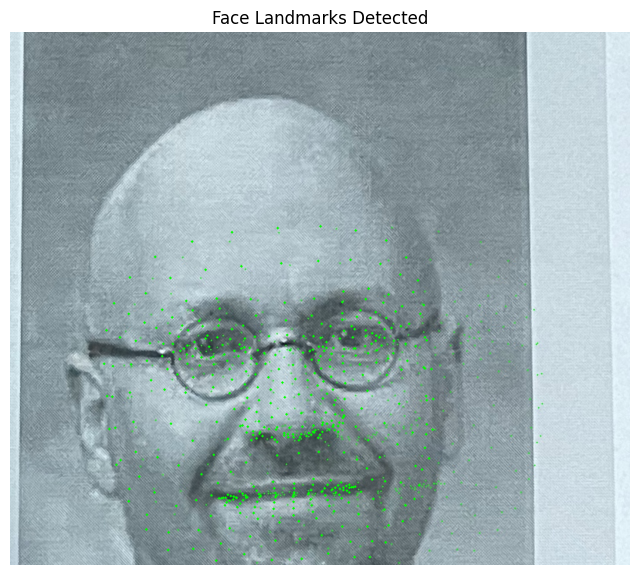

In [85]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True)

image_path = 'face_with_markers.jpg'
image = cv2.imread(image_path)
if image is None:
    print("Image not found.")
else:
    print("Image loaded successfully.")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = face_mesh.process(image_rgb)

if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        for id, landmark in enumerate(face_landmarks.landmark):
            h, w, _ = image.shape
            x, y = int(landmark.x * w), int(landmark.y * h)
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

    output_path = 'image_with_face_landmarks.png'
    cv2.imwrite(output_path, image)
    print(f"Image with face landmarks saved at {output_path}")
else:
    print("No face landmarks detected.")

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.title("Face Landmarks Detected")
plt.show()